In [1]:
%pip install ultralytics
%pip install supervision
%pip install onnx
import ultralytics
ultralytics.checks()

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/112.6 GB disk)


In [7]:
ultralytics.checks()

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.1/112.6 GB disk)


In [ ]:
!rm -r /content/CarsDataset

In [ ]:
!unzip /content/datasets/PokerCards.zip

In [9]:
!yolo task=detect mode=train model=yolo11l.pt data=/content/datasets/PokerCards/data.yaml epochs=10 imgsz=640 plots=True

100% 49.0M/49.0M [00:00<00:00, 245MB/s]
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/datasets/PokerCards/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

In [12]:
!ls /content/runs/detect/train5/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1735014739.f91a36e1cc38.6321.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


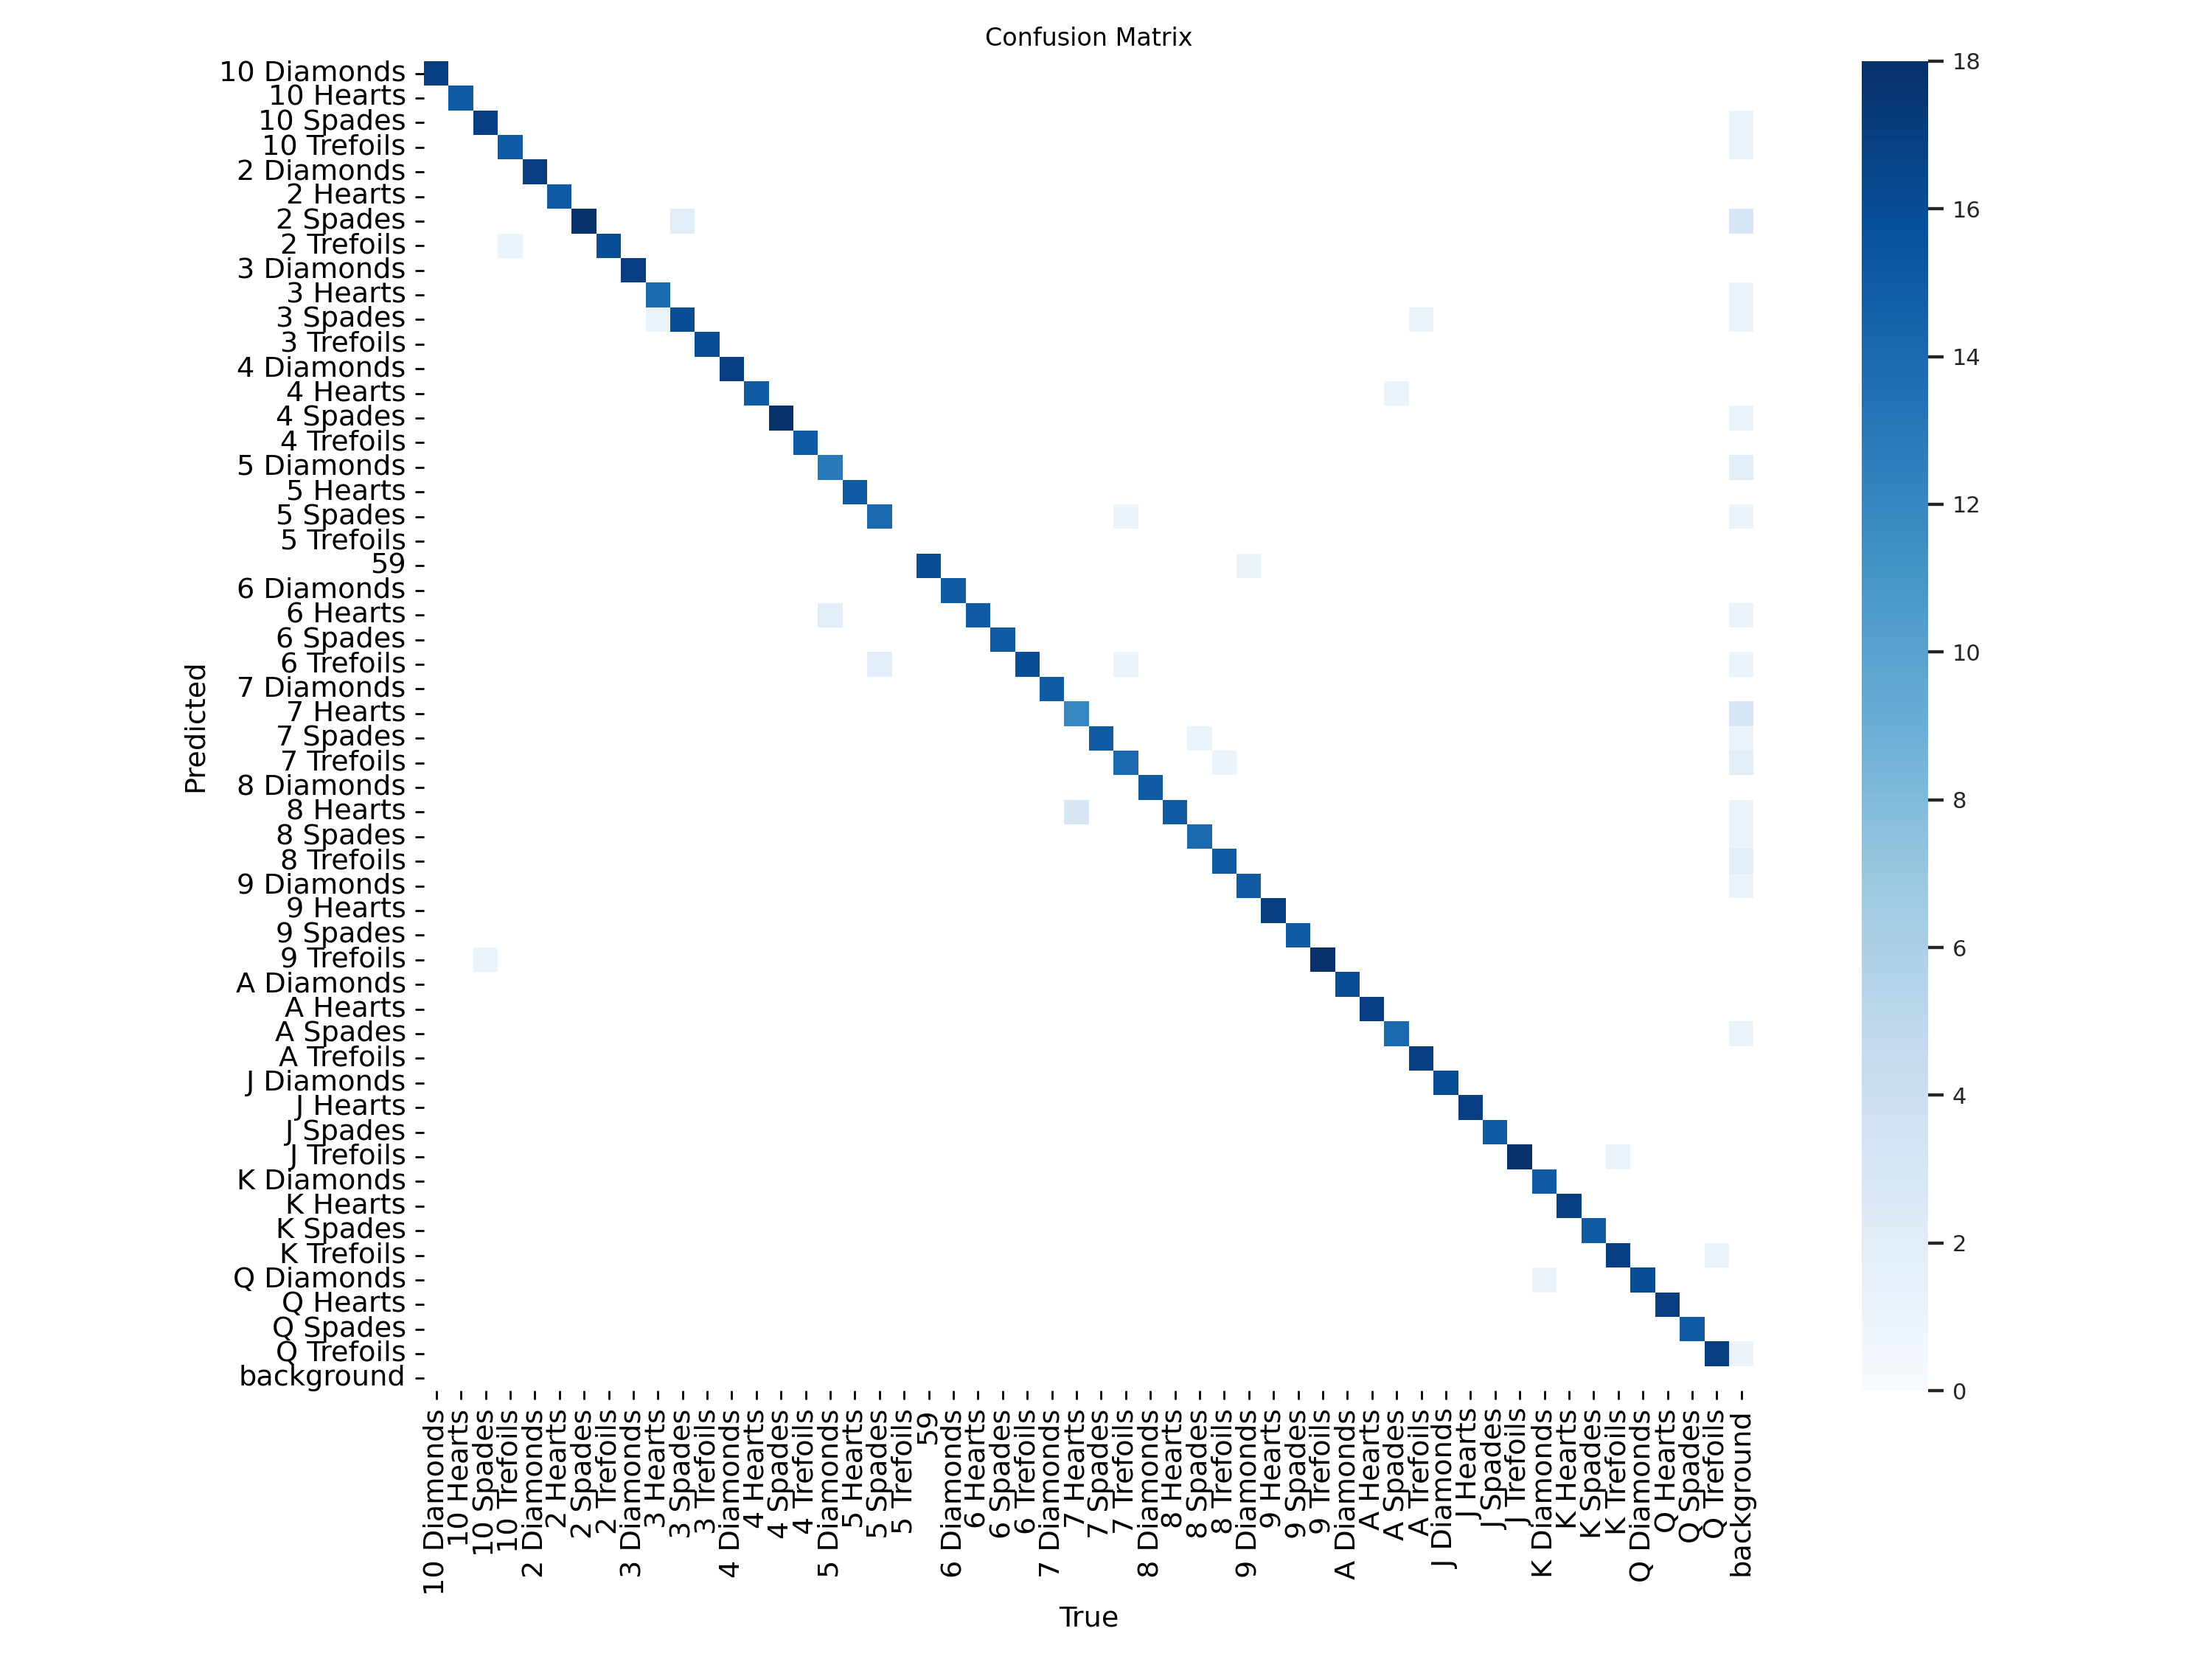

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/train5/confusion_matrix.png', width=600)

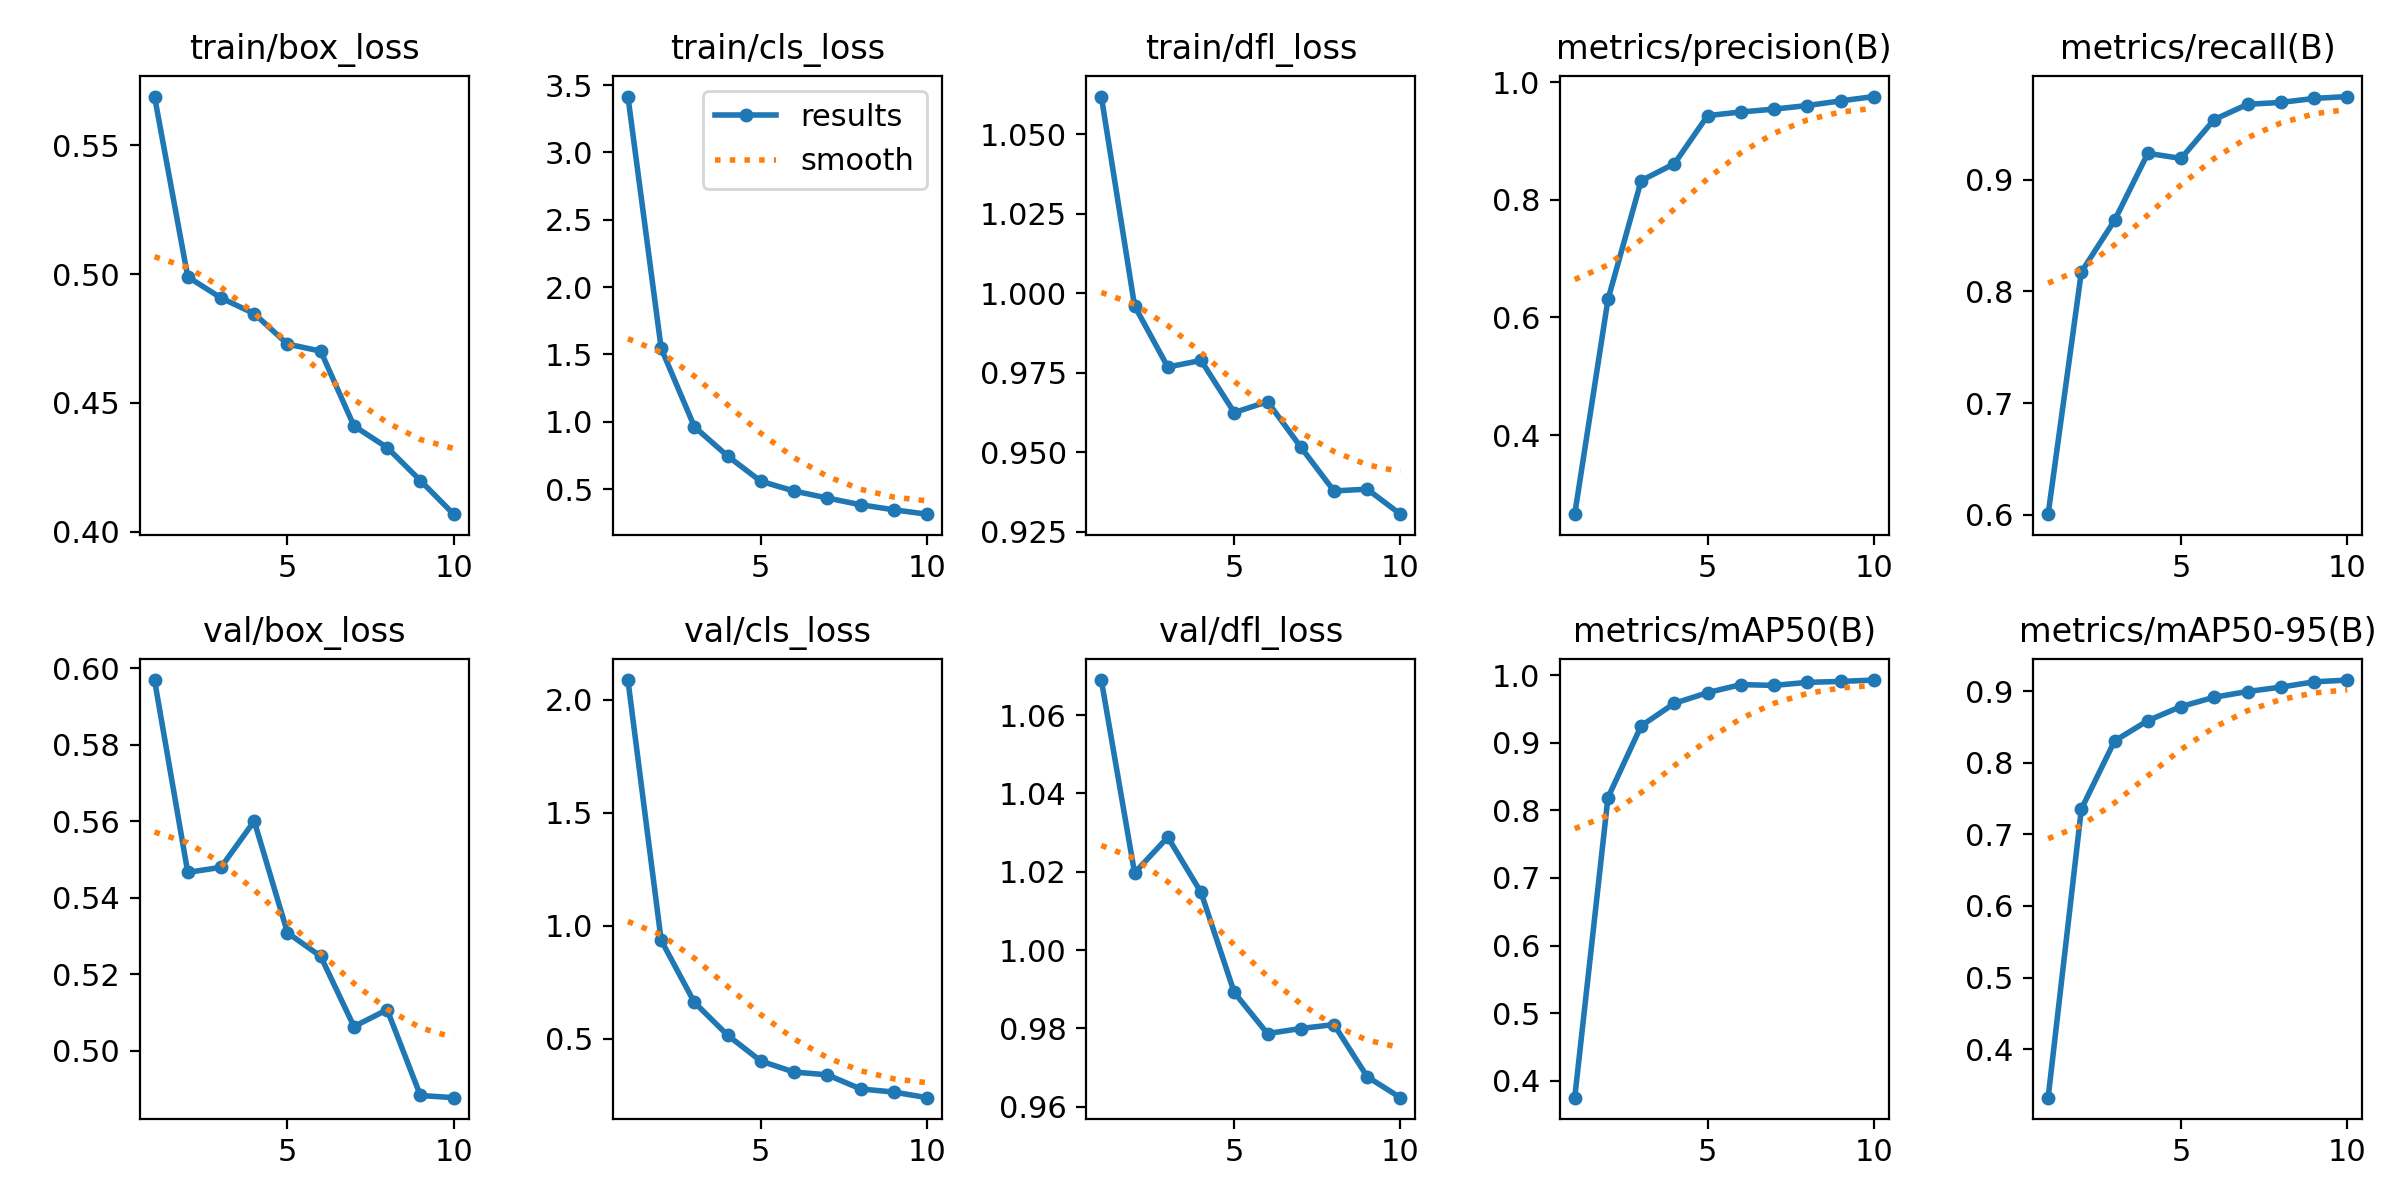

In [14]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/train5/results.png', width=600)

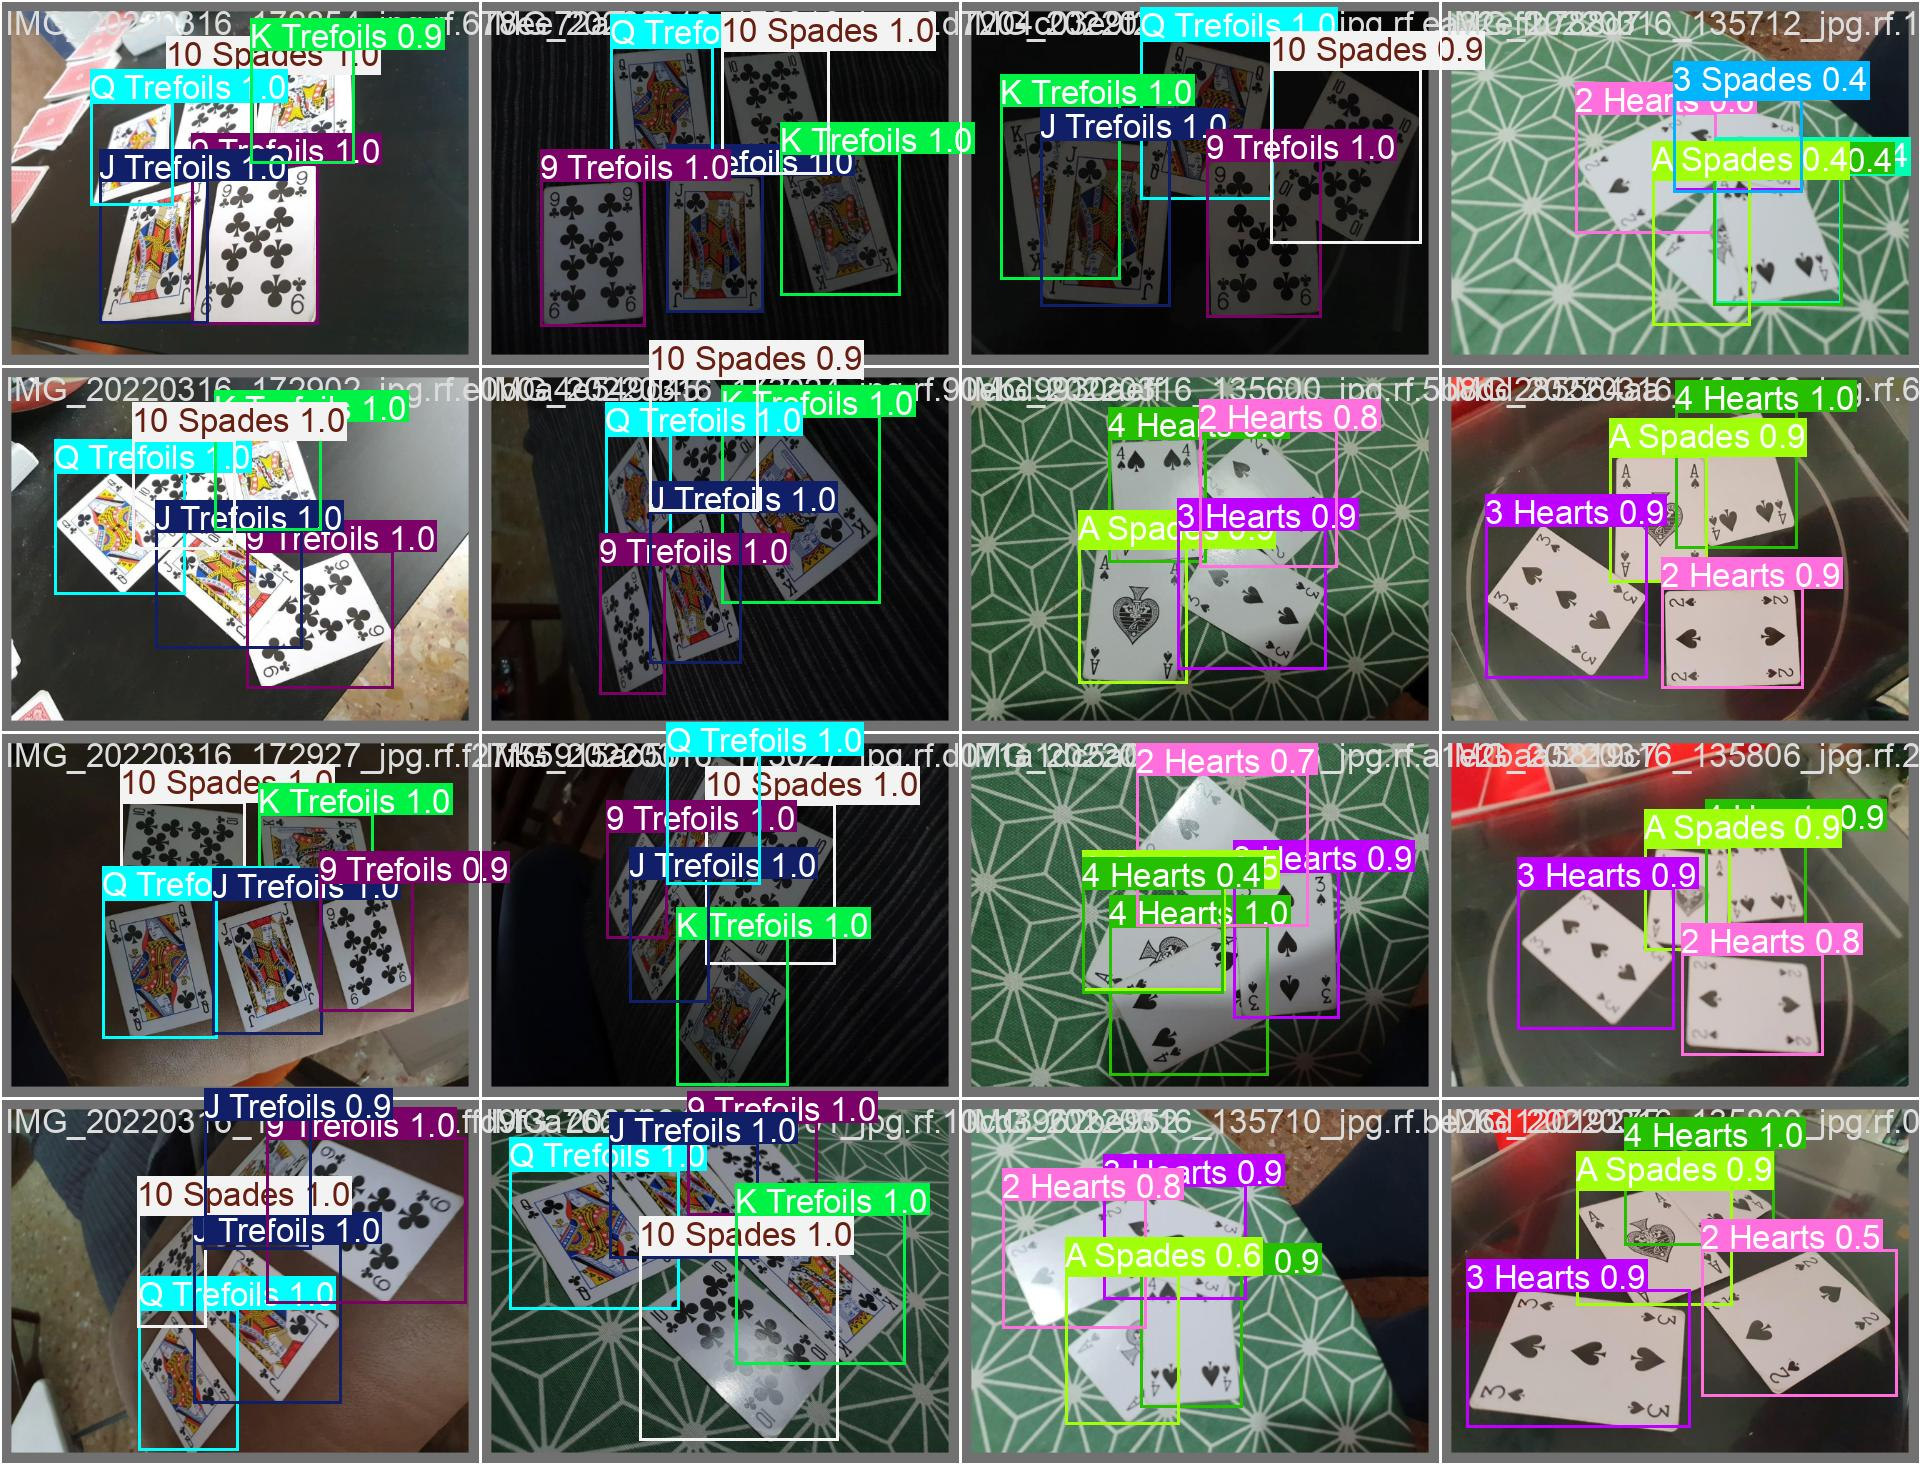

In [15]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/train5/val_batch0_pred.jpg', width=600)

In [16]:
!yolo task=detect mode=val model=/content/runs/detect/train5/weights/best.pt data=/content/datasets/PokerCards/data.yaml


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,320,175 parameters, 0 gradients, 86.8 GFLOPs
val: Scanning /content/datasets/PokerCards/valid/labels.cache... 193 images, 0 backgrounds, 0 corrupt: 100% 193/193 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:07<00:00,  1.82it/s]
                   all        193        838      0.975      0.974      0.993      0.915
           10 Diamonds         17         17      0.987          1      0.995      0.867
             10 Hearts         15         15      0.985          1      0.995      0.899
             10 Spades         18         18          1      0.964      0.995      0.959
           10 Trefoils         16         16      0.998          1      0.995      0.875
            2 Diamonds         17         17      0.999          1      0.995      0.869
              2 Hearts         15       

In [17]:
!yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt conf=0.25 source=/content/datasets/PokerCards/test/images save=True

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,320,175 parameters, 0 gradients, 86.8 GFLOPs

image 1/128 /content/datasets/PokerCards/test/images/IMG_20220316_135316_jpg.rf.73bfd93ba6f1293a44936e5ed9656fa4.jpg: 480x640 1 3 Hearts, 1 4 Hearts, 1 A Spades, 76.3ms
image 2/128 /content/datasets/PokerCards/test/images/IMG_20220316_135319_jpg.rf.f2eb8cd855cd211a94b86697ae9f3c78.jpg: 480x640 1 2 Hearts, 1 3 Hearts, 1 4 Hearts, 1 A Spades, 37.8ms
image 3/128 /content/datasets/PokerCards/test/images/IMG_20220316_135321_jpg.rf.16f3952b7a317168f325e4c7e30acfcc.jpg: 480x640 1 2 Hearts, 1 3 Hearts, 1 4 Hearts, 1 A Spades, 37.8ms
image 4/128 /content/datasets/PokerCards/test/images/IMG_20220316_135327_jpg.rf.471d0c3c424beb6f47cc5443f58ff3c5.jpg: 480x640 1 2 Hearts, 1 3 Hearts, 2 4 Heartss, 1 A Spades, 35.3ms
image 5/128 /content/datasets/PokerCards/test/images/IMG_20220316_135507_jpg.rf.6ee030e8c20b41ac87fc358e892c965e.jpg: 4

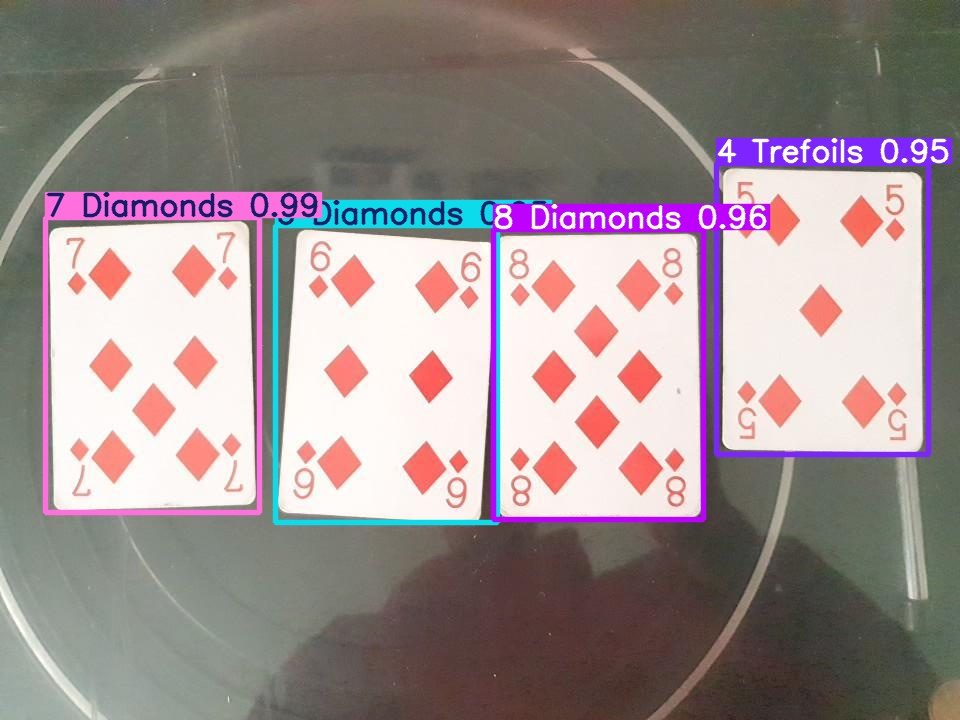

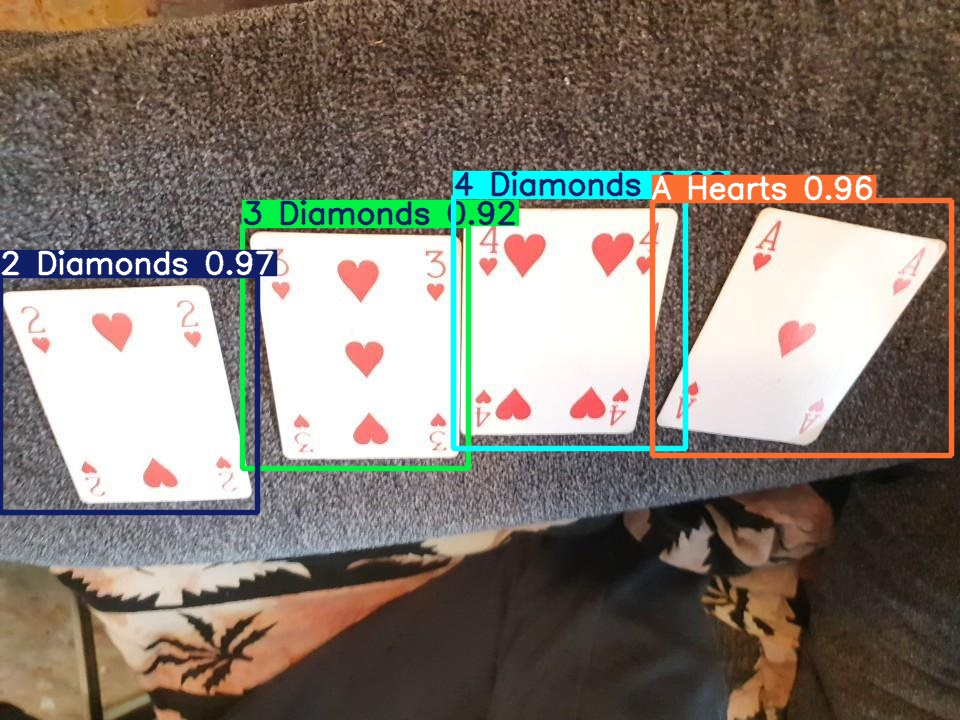

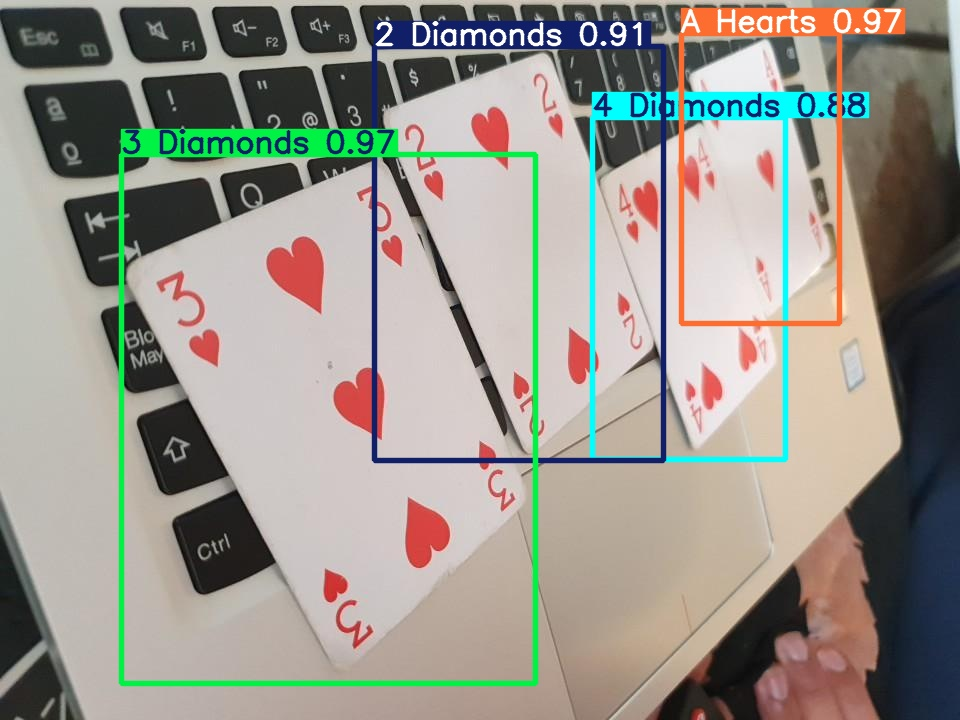

In [18]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [19]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train5/weights/best.pt')


In [20]:
model.export(format = 'onnx', opset = 12, simplify = False, half = False, device = 'gpu')

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:gpu (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,320,175 parameters, 0 gradients, 86.8 GFLOPs

PyTorch: starting from '/content/runs/detect/train5/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 57, 8400) (48.9 MB)

ONNX: starting export with onnx 1.17.0 opset 12...
ONNX: export success ✅ 2.6s, saved as '/content/runs/detect/train5/weights/best.onnx' (96.9 MB)

Export complete (3.9s)
Results saved to /content/runs/detect/train5/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train5/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train5/weights/best.onnx imgsz=640 data=/content/datasets/PokerCards/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/train5/weights/best.onnx'